In [146]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [147]:
pd.options.display.max_rows = 1000

In [148]:
# Preprocessing Input data
data = pd.read_csv('data/covid_data.csv', low_memory = False)

In [149]:
pd.set_option('display.max_columns', None)
data.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.122,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.122,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [150]:
data.corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.671281,0.694447,0.936471,0.437488,0.452197,0.096539,0.011118,0.019262,0.117472,-0.002134,-0.002758,0.015249,0.427364,-0.009693,0.543343,-0.004175,0.180461,-0.086610,5.345798e-01,-1.454973e-02,0.857953,0.577009,0.095714,0.011806,0.088549,0.017699,0.044091,-0.017761,0.825825,0.825345,0.828205,0.837732,0.441283,0.475606,0.150732,0.146104,0.136012,0.029545,-0.018182,0.369438,-0.036961,-0.099538,-0.016361,0.040162,0.039862,0.038303,0.017034,-0.036995,-0.042432,0.002806,0.002295,-0.002528,3.273620e-02,0.007190,0.020333,0.044100,0.614839,0.753939,0.093883,-0.022547,0.189320
new_cases,0.671281,1.000000,0.972716,0.705354,0.645232,0.632060,0.050278,0.055671,0.076962,0.071847,0.027721,0.038517,0.034652,0.566308,0.141977,0.708142,0.124544,0.371483,0.002864,6.638340e-01,5.204438e-02,0.446090,0.546949,0.070955,0.069460,0.082976,0.075642,0.177313,-0.015176,0.548923,0.566399,0.555657,0.458893,0.489268,0.509483,0.076909,0.070801,0.067100,-0.021554,0.020798,0.386417,-0.017362,0.017859,-0.014667,0.045548,0.046743,0.046336,0.020657,-0.035473,-0.045700,-0.000621,0.006337,0.001461,3.048411e-02,0.020700,0.025256,0.046879,0.543217,0.327804,0.049482,0.083522,0.054802
new_cases_smoothed,0.694447,0.972716,1.000000,0.725595,0.639532,0.651794,0.052823,0.046911,0.079204,0.074411,0.024378,0.040885,0.029602,0.620019,0.158048,0.777611,0.140638,0.427288,0.008202,7.314564e-01,6.079343e-02,0.473537,0.555368,0.075653,0.065636,0.087318,0.077916,0.190999,-0.015997,0.565814,0.583026,0.572416,0.478058,0.485940,0.517919,0.079649,0.072849,0.068959,-0.019917,0.019853,0.392629,-0.018183,0.017451,-0.015012,0.046449,0.047625,0.047191,0.021031,-0.036229,-0.046634,-0.000529,0.006393,0.001512,3.108864e-02,0.021028,0.025714,0.047844,0.557834,0.426156,0.040194,0.064064,0.071633
total_deaths,0.936471,0.705354,0.725595,1.000000,0.605267,0.624088,0.043576,0.002817,0.004377,0.127753,0.005605,0.010745,0.020758,0.572833,0.058951,0.633431,0.007659,0.333533,-0.068638,6.475006e-01,-2.721493e-03,0.773960,0.583425,0.030820,-0.008799,0.082783,-0.008990,0.029824,-0.018476,0.831558,0.853168,0.836030,0.749623,0.608914,0.637719,0.094357,0.104888,0.081868,-0.072804,0.015922,0.536702,-0.009995,-0.039652,-0.020222,0.034048,0.029642,0.027043,0.006654,-0.044505,-0.038895,0.012228,-0.007050,-0.002020,4.293531e-02,-0.006477,0.016506,0.039991,0.712860,0.926142,0.280627,0.016416,0.303454
new_deaths,0.437488,0.645232,0.639532,0.605267,1.000000,0.976632,-0.032253,0.008870,0.008945,0.029044,0.065524,0.094107,0.027227,0.846498,0.304960,0.848142,0.198440,0.611968,0.093181,8.104653e-01,6.299927e-02,0.363663,0.508835,-0.033620,-0.014832,0.068595,-0.012627,

# A. Cleaning Data

## Select variables related to 'new_cases' based on the correlation(over 0.5) of it

In [151]:
corr = data.corr()

In [152]:
corr = corr['new_cases']
corr_var=corr>=0.5
newcases_corr = corr[corr_var]

In [153]:
filtered_columns = pd.DataFrame(newcases_corr[:,]).index

In [154]:
filtered_columns

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'icu_patients', 'hosp_patients',
       'weekly_hosp_admissions', 'new_tests', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'new_vaccinations_smoothed', 'population'],
      dtype='object')

## Add `continent` and `date`, which have no correlation since they are categorical variables.

In [155]:
data = data[data.columns[data.columns.isin(filtered_columns | ['continent', 'date'])]]

In [156]:
data.head(5)

,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,icu_patients,hosp_patients,weekly_hosp_admissions,new_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations_smoothed,population
0,Asia,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


## Drop the columns if it is less than the minimum thresh (60%)

In [157]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

In [158]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
weekly_hosp_admissions,219059,92.0
icu_patients,206051,86.5
hosp_patients,202093,84.8
people_fully_vaccinated,176011,73.9
people_vaccinated,173366,72.8
total_vaccinations,170363,71.5
new_tests,162831,68.3
new_vaccinations_smoothed,97807,41.1
new_deaths_smoothed,34063,14.3
new_deaths,32879,13.8


In [159]:
perc = 60.0 # N %
min_count =  int(((100-perc)/100)*data.shape[0] + 1)
data = data.dropna( axis=1, 
                thresh=min_count)

## Remove outliers

In [160]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(data)

capping the  continent
capping the  date
capping the  total_cases
capping the  new_cases
capping the  new_cases_smoothed
capping the  total_deaths
capping the  new_deaths
capping the  new_deaths_smoothed
capping the  new_vaccinations_smoothed
capping the  population


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## Data type changes for `date` and one-hot encode for the categorical variables

In [161]:
final_df['date']= pd.to_datetime(final_df['date'])
final_df['year'] = final_df['date'].dt.year
final_df['month'] = final_df['date'].dt.month

In [162]:
final_df = final_df.drop(['date'], axis=1)

In [163]:
final_df['year'] = pd.Categorical(final_df['year'])
final_df['month'] = pd.Categorical(final_df['month'])

In [164]:
final_df.head(5)

,continent,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_vaccinations_smoothed,population,year,month
0,Asia,5.0,5.0,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
1,Asia,5.0,0.0,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
2,Asia,5.0,0.0,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
3,Asia,5.0,0.0,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2
4,Asia,5.0,0.0,NaN,NaN,NaN,NaN,NaN,41128772.0,2020,2


In [165]:
# One-hot encode the data using pandas get_dummies
final_df = pd.get_dummies(final_df)

## Remove rows including NA 

In [166]:
final_df = final_df.dropna()

In [167]:
final_df.head(5)

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,new_vaccinations_smoothed,population,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,year_2020,year_2021,year_2022,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
365,55646.0,29.0,18.286,2435.0,2.0,1.000,1367.0,41128772.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
366,55664.0,18.0,17.714,2436.0,1.0,1.143,1367.0,41128772.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
367,55680.0,16.0,17.571,2438.0,2.0,1.143,1367.0,41128772.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
368,55696.0,16.0,17.286,2442.0,4.0,1.714,1367.0,41128772.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
369,55707.0,11.0,18.143,2443.0,1.0,1.857,1367.0,41128772.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


# B. Modeling 
# 1. RandomForest
## Let's use the RandomForest to find important features for `new_cases`

In [168]:
features = final_df

In [169]:
list(features.columns)

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'new_vaccinations_smoothed',
 'population',
 'continent_Africa',
 'continent_Asia',
 'continent_Europe',
 'continent_North America',
 'continent_Oceania',
 'continent_South America',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

In [170]:
# Use numpy to convert to arrays
# Labels are the values we want to predict
y = np.array(features['new_cases'])
# Remove the labels from the features
# axis 1 refers to the columns
x = features.drop(['new_cases', 'new_cases_smoothed'], axis = 1)
#features = features.iloc[:, np.r_[0, 3:9]]

# Saving feature names for later use
feature_list = list(x.columns)
# Convert to numpy array
#features = np.array(x)

In [171]:
feature_list

['total_cases',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'new_vaccinations_smoothed',
 'population',
 'continent_Africa',
 'continent_Asia',
 'continent_Europe',
 'continent_North America',
 'continent_Oceania',
 'continent_South America',
 'year_2020',
 'year_2021',
 'year_2022',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12']

## Normalization

In [172]:
from sklearn.preprocessing import scale
x = scale(x)
y = scale(y)

In [173]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30)

In [174]:
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor

set_config(print_changed_only=False)
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
print(rfr)

rfr.fit(xtrain, ytrain)

score = rfr.score(xtrain, ytrain)
print("R-squared:", score)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
R-squared: 0.9962339967461223


## After using 100 regression trees, we got 99 R-square, which seems like overfitting.
## Let's check error rate and prediction by the plot

In [175]:
from sklearn.metrics import mean_squared_error

ypred = rfr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  0.026880934885500266
RMSE:  0.013440467442750133


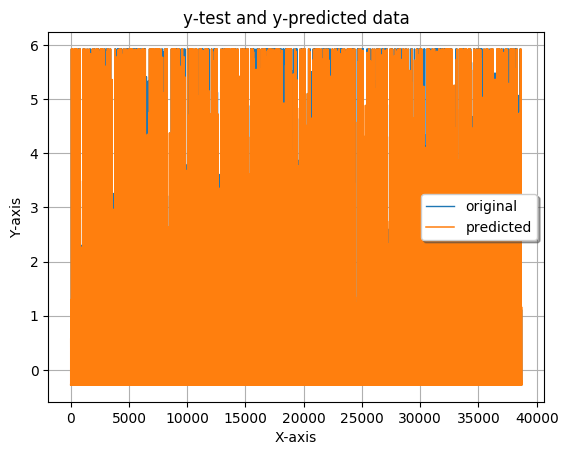

In [176]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

## Let's check important features for `new_cases`

In [177]:
rfr.feature_importances_

array([1.86168013e-01, 3.54320064e-02, 4.66574581e-01, 2.24301946e-01,
       2.10376476e-02, 2.05080085e-02, 1.60621055e-05, 8.90121861e-04,
       6.57848317e-04, 9.48749818e-04, 2.62826471e-04, 2.98287708e-04,
       5.80177144e-05, 4.76845159e-03, 1.36683044e-02, 1.00189969e-02,
       1.83455509e-03, 2.06583654e-03, 1.52026775e-03, 6.56928642e-04,
       1.34186083e-03, 2.32730971e-03, 1.28196134e-03, 7.18676807e-04,
       6.08844638e-04, 5.96229489e-04, 1.43765916e-03])

In [178]:
feature_list = np.asarray(feature_list)
feature_list

array(['total_cases', 'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'new_vaccinations_smoothed', 'population', 'continent_Africa',
       'continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America', 'year_2020',
       'year_2021', 'year_2022', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'], dtype='<U25')

Text(0.5, 0, 'Random Forest Feature Importance')

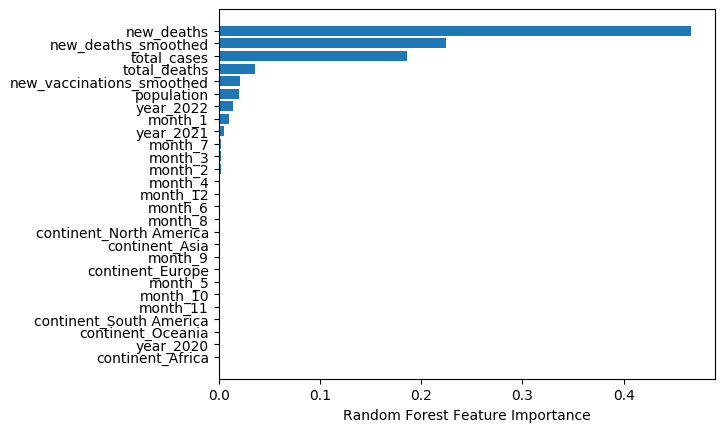

In [179]:
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(feature_list[sorted_idx], rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## `new_deaths`, `new_deaths_smoothed`, `total_cases` seems like strong predictors, and `new_vaccinations_smoothed`, `population` show slight importances.

## Let's build the multiple linear regression by these predictors, since the randomforrest is overfitting

# 2. Multiple Linear regression

In [180]:
X = final_df[["new_deaths", "new_deaths_smoothed", "total_cases", "total_deaths", "new_vaccinations_smoothed", "population"]]
X1 = final_df[["new_deaths", "new_deaths_smoothed", "total_cases"]]
Y = final_df[["new_cases"]]

## Exploring features

Text(0, 0.5, 'new_cases')

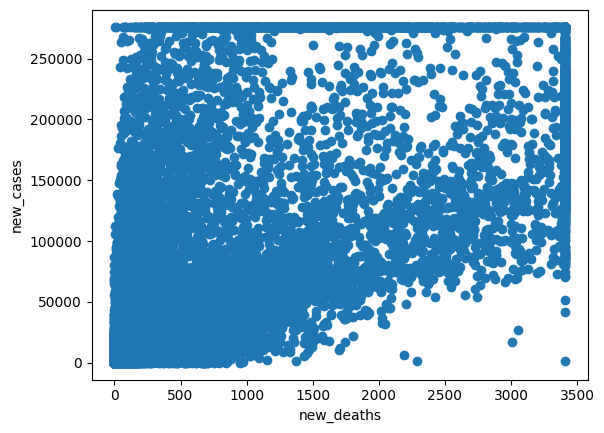

In [181]:
plt.scatter(X["new_deaths"],Y)
plt.xlabel("new_deaths")
plt.ylabel("new_cases")

Text(0, 0.5, 'new_cases')

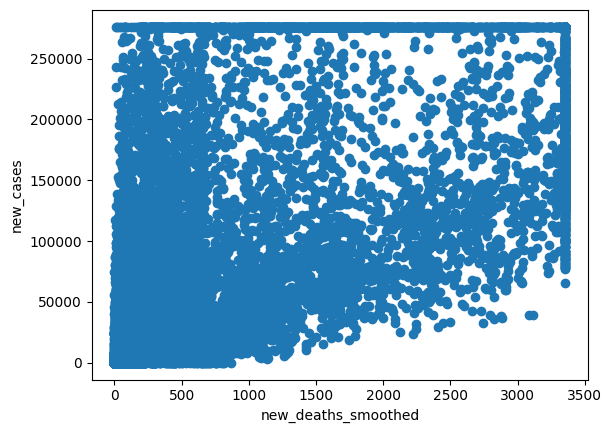

In [182]:
plt.scatter(X["new_deaths_smoothed"],Y)
plt.xlabel("new_deaths_smoothed")
plt.ylabel("new_cases")

Text(0, 0.5, 'new_cases')

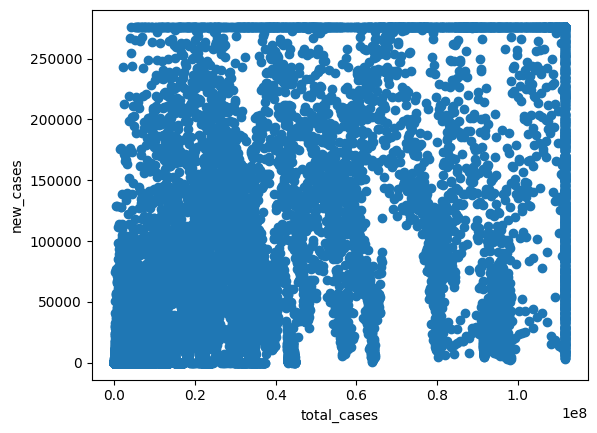

In [183]:
plt.scatter(X["total_cases"],Y)
plt.xlabel("total_cases")
plt.ylabel("new_cases")

Text(0, 0.5, 'new_cases')

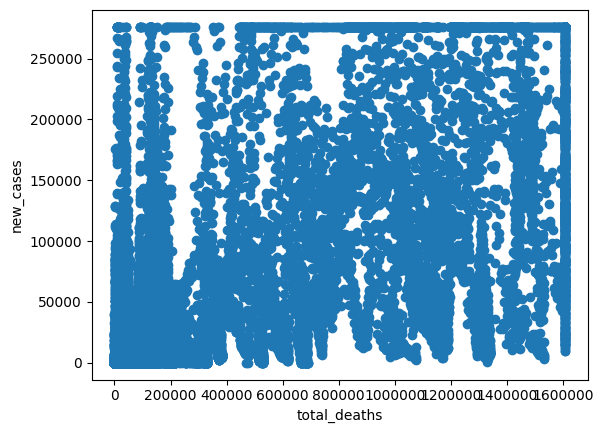

In [184]:
plt.scatter(X["total_deaths"],Y)
plt.xlabel("total_deaths")
plt.ylabel("new_cases")

Text(0, 0.5, 'new_cases')

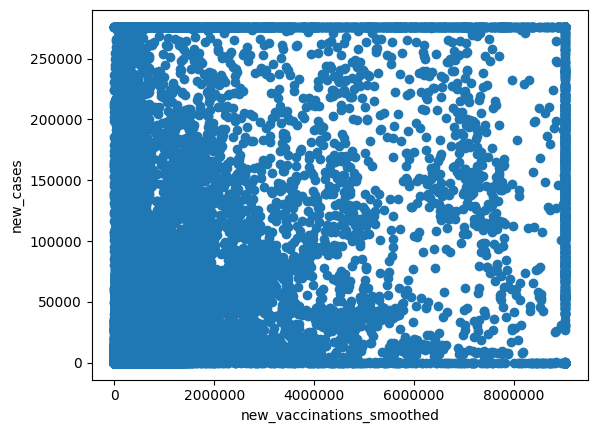

In [185]:
plt.scatter(X["new_vaccinations_smoothed"],Y)
plt.xlabel("new_vaccinations_smoothed")
plt.ylabel("new_cases")

Text(0, 0.5, 'new_cases')

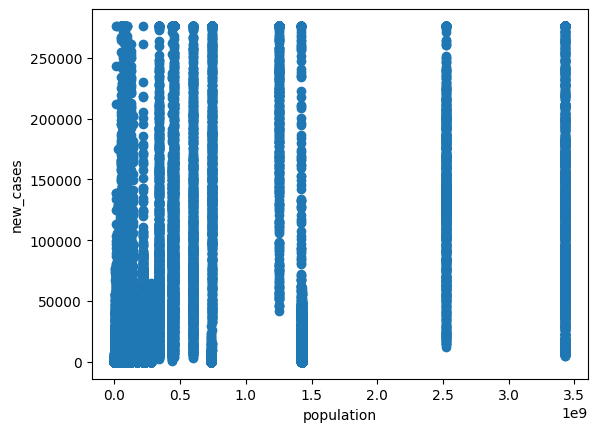

In [186]:
plt.scatter(X["population"],Y)
plt.xlabel("population")
plt.ylabel("new_cases")

## There are more small of population for the `new_cases` than large population

## Divide into train/test dataset

In [202]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3, random_state=101)

## Normalization 

In [203]:
from sklearn import preprocessing
x_scaler = preprocessing.StandardScaler().fit(X_train)
X_train = x_scaler.transform(X_train)

y_scaler = preprocessing.StandardScaler().fit(y_train)
y_train = y_scaler.transform(y_train)

In [204]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                 normalize='deprecated', positive=False)

In [205]:
print (f"Model coeficients for features {X1.columns} are {model.coef_}")

Model coeficients for features Index(['new_deaths', 'new_deaths_smoothed', 'total_cases'], dtype='object') are [[ 0.52899128 -0.02082223  0.47397942]]


Text(0, 0.5, 'new_cases')

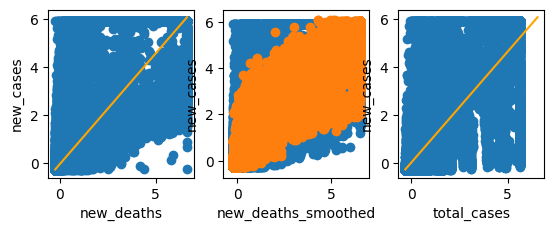

In [206]:
y_pred= model.predict(X_train)

plt.subplot(2, 3, 1)
plt.scatter(X_train[:, 0], y_train)
plt.plot([min(X_train[:, 0]), max(X_train[:, 0])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("new_deaths")
plt.ylabel("new_cases")

plt.subplot(2, 3, 2)
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_train[:, 1],y_pred)
plt.xlabel("new_deaths_smoothed")
plt.ylabel("new_cases")

plt.subplot(2, 3, 3)
plt.scatter(X_train[:, 2], y_train)
plt.plot([min(X_train[:, 2]), max(X_train[:, 1])], [min(y_pred), max(y_pred)], color="orange")
plt.xlabel("total_cases")
plt.ylabel("new_cases")

## Model Testing: Testing data

In [192]:
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
y_pred= model.predict(X_test)

In [193]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
pd.DataFrame([MSE, RMSE], index=['MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MSE,0.204232
RMSE,0.451921


In [194]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7959330086919738

## R-squared of the multiple linear regression is around 80, which seems not overfitting. Since  predictors are not very strong, it is expectable.

In [195]:
y_pred

array([[-0.25190222],
       [-0.26769983],
       [-0.24305113],
       ...,
       [-0.22746004],
       [-0.12649364],
       [ 0.64387483]])

In [196]:
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[ 1130.69639584],
       [  427.79098343],
       [ 1524.5205535 ],
       ...,
       [ 2218.23694911],
       [ 6710.67819015],
       [40987.77427709]])